## Image Embedding using Google MediaPipe

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision, BaseOptions
from mediapipe.tasks.python.vision import ImageEmbedder, ImageEmbedderOptions, RunningMode

import sys

if "../" not in sys.path:
    sys.path.append("../")

from image_embedding import ImageEmbedding

ie = ImageEmbedding()

In [2]:
ie.base_options

BaseOptions(model_asset_path='mobilenet_v3_large_075_224_embedder.tflite', model_asset_buffer=None, delegate=None)

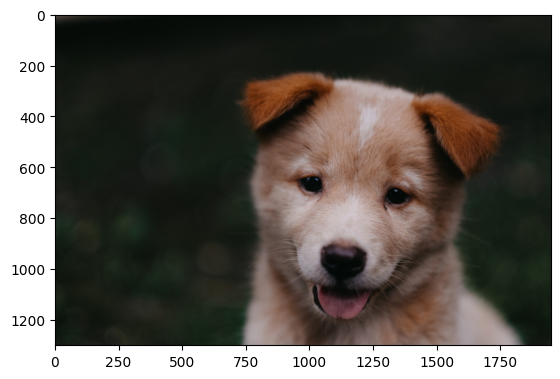

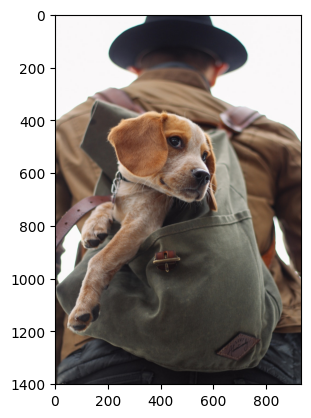

In [3]:

IMAGE_FILENAMES = ["../images\\00-puppy.jpg",
                   "../images\\dog_backpack.png"]

dog_1 = cv2.imread(IMAGE_FILENAMES[0])
dog_2 = cv2.imread(IMAGE_FILENAMES[1])

for img in [dog_1, dog_2]:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

### Resize image to 224 x 224 as input for the model

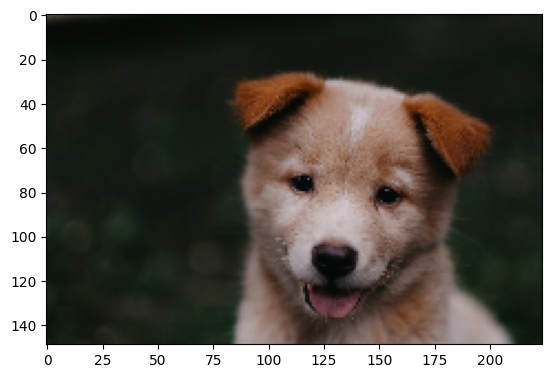

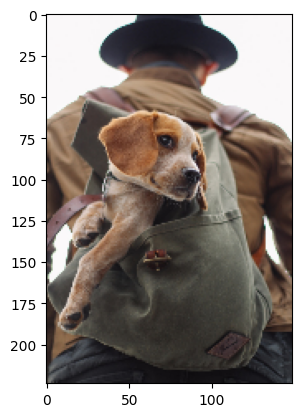

In [4]:
import math
DESIRED_HEIGHT = 224
DESIRED_WIDTH = 224

def resize_img(image):
    # From image
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))

    # img = cv2.resize(image, (DESIRED_WIDTH, DESIRED_HEIGHT))

    return img

for img in [dog_1, dog_2]:
    img = resize_img(img)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [5]:
cv2.__version__

'4.11.0'

### Create image embedding and calculate similarity

In [7]:
gorilla = "../images/gorilla.jpg"

# create options for image embedder
base_options = BaseOptions(model_asset_path="../mobilenet_v3_large_075_224_embedder.tflite")
l2_normalize = True # so the sum of each row is 1
quantize = True # according to wiki -> make the values from float to int
options = ImageEmbedderOptions(base_options=base_options,
                               l2_normalize=l2_normalize,
                               quantize=quantize)

# create image embedder
with ImageEmbedder.create_from_options(options) as embedder:
    
    # format images
    first_image = mp.Image.create_from_file(IMAGE_FILENAMES[0])
    second_image = mp.Image.create_from_file(IMAGE_FILENAMES[1]) # ~ 0.14 which is still quite low
    # second_image = mp.Image.create_from_file(gorilla)
    # second_image = mp.Image.create_from_file(IMAGE_FILENAMES[0]) # should return 1.0 as it's the same image
    first_embedding_result = embedder.embed(first_image)
    second_embedding_result = embedder.embed(second_image)

    # calculate similarity between images
    similarity = ImageEmbedder.cosine_similarity(
        first_embedding_result.embeddings[0],
        second_embedding_result.embeddings[0])
    print(similarity)

0.14285158572232207
